### DSO105 Intermediate Stats L1 Hands On

In [3]:
## import packages

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## laod data

In [3]:
anime = pd.read_csv('../../datasets/anime.csv')

In [ ]:
## playing around with bang (!) symbol

In [4]:
! dir

## shows me which directory I am working in

 Volume in drive C is OS
 Volume Serial Number is 10FB-5B8D

 Directory of C:\Users\nolan\OneDrive\Documents\GitHub\CurriculumPlayground\notebooks\Intermediate Statistics

07/27/2021  01:12 PM    <DIR>          .
07/27/2021  01:12 PM    <DIR>          ..
07/27/2021  01:10 PM    <DIR>          .ipynb_checkpoints
07/27/2021  12:55 PM            80,348 DSO105 Intermediate Stats L1 Hands On.ipynb
07/27/2021  01:04 PM           463,947 DSO105 Intermediate Stats L1.ipynb
07/27/2021  01:06 PM           634,731 DSO105 Intermediate Stats L2 - Python (starting with page 7).ipynb
07/27/2021  01:07 PM           367,289 DSO105 Intermediate Stats L2 - R.ipynb
07/27/2021  01:07 PM           212,966 DSO105 Intermediate Stats L2 Hands On - Python.ipynb
07/27/2021  01:08 PM           182,541 DSO105 Intermediate Stats L2 Hands On - R.ipynb
07/27/2021  01:09 PM            41,849 DSO105 Intermediate Stats L3 - Python.ipynb
07/27/2021  01:09 PM            75,333 DSO105 Intermediate Stats L3 - R.ipynb
07/27/

In [28]:
! ping google.com

## just pings the outside site of google


Pinging google.com [2607:f8b0:4000:810::200e] with 32 bytes of data:
Reply from 2607:f8b0:4000:810::200e: time=17ms 
Reply from 2607:f8b0:4000:810::200e: time=18ms 
Reply from 2607:f8b0:4000:810::200e: time=19ms 
Reply from 2607:f8b0:4000:810::200e: time=18ms 

Ping statistics for 2607:f8b0:4000:810::200e:
    Packets: Sent = 4, Received = 4, Lost = 0 (0% loss),
Approximate round trip times in milli-seconds:
    Minimum = 17ms, Maximum = 19ms, Average = 18ms


In [29]:
! dir ..

## goes back 1 directory from the one I am working

 Volume in drive C is OS
 Volume Serial Number is 10FB-5B8D

 Directory of C:\Users\nolan\OneDrive\Documents\GitHub\CurriculumPlayground\notebooks

07/27/2021  12:37 PM    <DIR>          .
07/27/2021  12:37 PM    <DIR>          ..
07/26/2021  06:47 PM    <DIR>          .ipynb_checkpoints
07/26/2021  06:11 PM             3,009 BorderCrossing.ipynb
07/26/2021  05:25 PM    <DIR>          Devin's Chicago Data Exploration
07/21/2021  10:48 AM            19,028 DSO102 @ L3, beginning page 2_Rplayground.ipynb
07/22/2021  12:17 PM    <DIR>          DSO104 L1 HandsOn R + Python
07/27/2021  12:54 PM    <DIR>          Intermediate Statistics
07/26/2021  06:15 PM             4,044 Untitled.ipynb
07/26/2021  06:22 PM             2,286 Untitled1.ipynb
07/26/2021  06:46 PM             3,248 Untitled2.ipynb
07/26/2021  06:49 PM             2,253 Untitled3.ipynb
               6 File(s)         33,868 bytes
               6 Dir(s)  607,044,587,520 bytes free


In [30]:
! dir ..\..

## goes back 2 directories from where I am working

 Volume in drive C is OS
 Volume Serial Number is 10FB-5B8D

 Directory of C:\Users\nolan\OneDrive\Documents\GitHub\CurriculumPlayground

07/20/2021  03:06 PM    <DIR>          .
07/20/2021  03:06 PM    <DIR>          ..
07/19/2021  09:33 PM                30 .gitignore
07/20/2021  03:06 PM    <DIR>          .ipynb_checkpoints
07/19/2021  04:00 PM             6,610 1_Install_R.ipynb
07/27/2021  11:20 AM    <DIR>          datasets
07/26/2021  04:32 PM    <DIR>          media
07/27/2021  12:37 PM    <DIR>          notebooks
07/19/2021  09:20 PM                22 README.md
               3 File(s)          6,662 bytes
               6 Dir(s)  607,043,780,608 bytes free


In [26]:
## back to coursework

In [10]:
anime.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012


### Is a Rating Score of 6.2 Different from the Mean in this Dataset?

#### check for assumptions

<AxesSubplot:>

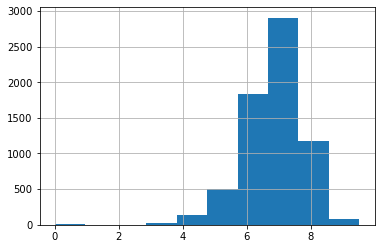

In [12]:
anime.score.hist()

In [9]:
anime.score.mean()

6.848998200359939

### Does Anime that is Still Airing Differ in Popularity from Anime that is No Longer Airing?

In [13]:
anime.status.unique()

array(['Finished Airing', 'Currently Airing'], dtype=object)

#### check for assumptions for Finished Airing and Currently Airing

<AxesSubplot:>

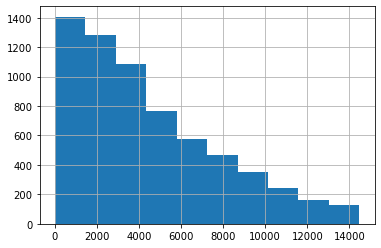

In [15]:
anime.popularity[anime.status == 'Finished Airing'].hist()
## histogram of anime popularity after if finishes its original run

##### looks like popularity goes down after an anime has finished producing episodes

<AxesSubplot:>

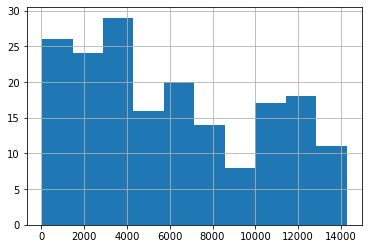

In [16]:
anime.popularity[anime.status == 'Currently Airing'].hist()
## histogram of anime popularity that is in its original run

In [17]:
## looks like popularity is up and down during an anime's original air

#### run an independent t-test

In [19]:
ttest_ind(anime.popularity[anime.status == 'Currently Airing'], anime.popularity[anime.status == 'Finished Airing'])

Ttest_indResult(statistic=6.489071311277514, pvalue=9.256789141747445e-11)

In [20]:
## there appears to be a significant difference

#### look at the means

In [21]:
anime.popularity[anime.status == 'Currently Airing'].mean()

6108.131147540984

In [22]:
anime.popularity[anime.status == 'Finished Airing'].mean()

4433.558057054742

In [23]:
## anime that is currently airing is way more popular than anime that is finished airing

### Does the Source of the Anime Influence the Type of Anime?

In [24]:
anime.source.unique()

array(['Manga', 'Original', 'Light novel', '4-koma manga', 'Novel',
       'Visual novel', 'Other', 'Game', 'Picture book', 'Card game',
       'Web manga', 'Book', 'Music', 'Radio', 'Digital manga'],
      dtype=object)

In [44]:
cleanup = {'Manga' : 'Manga', 'Original' : 'Other', 'Light novel' : 'Book', '4-koma manga' : 'Manga', 'Novel' : 'Book', 'Visual novel' : 'Book', 'Other' : 'Other', 'Game' : 'Game',
           'Picture book' : 'Novel', 'Card game' : 'Game', 'Web manga' : 'Manga', 'Book' : 'Book', 'Music' : 'Listening', 'Radio' : 'Listening', 'Digital manga' : 'Manga'}

In [45]:
anime2 = anime.replace({'source': cleanup})

In [46]:
anime2.source.unique()

array(['Manga', 'Other', 'Book', 'Game', 'Novel', 'Listening'],
      dtype=object)

#### create contingency table

In [48]:
crosstab = pd.crosstab(anime2['source'], anime['type'])

In [49]:
crosstab

type,Movie,Music,ONA,OVA,Special,TV
source,,,,,,
Book,151,1,57,388,172,552
Game,83,9,39,57,72,210
Listening,2,42,0,1,1,14
Manga,335,12,122,615,393,1328
Novel,12,1,5,1,2,32
Other,325,33,185,283,289,844


In [50]:
stats.chi2_contingency(crosstab)

(2213.892681185397,
 0.0,
 25,
 array([[1.79884223e+02, 1.94148170e+01, 8.08290342e+01, 2.66458458e+02,
         1.84044541e+02, 5.90368926e+02],
        [6.40011998e+01, 6.90761848e+00, 2.87582484e+01, 9.48035393e+01,
         6.54814037e+01, 2.10047990e+02],
        [8.17036593e+00, 8.81823635e-01, 3.67126575e+00, 1.21025795e+01,
         8.35932813e+00, 2.68146371e+01],
        [3.81964607e+02, 4.12252549e+01, 1.71631674e+02, 5.65795591e+02,
         3.90798590e+02, 1.25358428e+03],
        [7.21715657e+00, 7.78944211e-01, 3.24295141e+00, 1.06906119e+01,
         7.38407319e+00, 2.36862627e+01],
        [2.66762448e+02, 2.87915417e+01, 1.19866827e+02, 3.95149220e+02,
         2.72932064e+02, 8.75497900e+02]]))

In [51]:
## we can see that the source does influence the type

### How do the Variables about Popularity / Ranking Relate to Each Other?

In [52]:
## make a df of the variables we are examing

In [53]:
anime3 = anime[['score', 'scored_by', 'rank', 'popularity', 'members', 'favorites']]

In [54]:
anime3.head()

,score,scored_by,rank,popularity,members,favorites
0,7.63,139250,1274.0,231,283882,2809
1,7.89,91206,727.0,366,204003,2579
2,7.55,37129,1508.0,1173,70127,802
3,8.21,36501,307.0,916,93312,3344
4,8.67,107767,50.0,426,182765,2082


#### correlation matrix

In [57]:
anime3.corr(method='pearson')

,score,scored_by,rank,popularity,members,favorites
score,1.000000,0.381926,-0.898747,-0.688492,0.415626,0.256094
scored_by,0.381926,1.000000,-0.356686,-0.425719,0.987107,0.793949
rank,-0.898747,-0.356686,1.000000,0.777302,-0.391524,-0.208503
popularity,-0.688492,-0.425719,0.777302,1.000000,-0.474798,-0.210745
members,0.415626,0.987107,-0.391524,-0.474798,1.000000,0.781565
favorites,0.256094,0.793949,-0.208503,-0.210745,0.781565,1.000000


#### enhance interpretaion and visuals

In [59]:
anime3.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
## coolwarm palette

,score,scored_by,rank,popularity,members,favorites
score,1.0,0.38,-0.9,-0.69,0.42,0.26
scored_by,0.38,1.0,-0.36,-0.43,0.99,0.79
rank,-0.9,-0.36,1.0,0.78,-0.39,-0.21
popularity,-0.69,-0.43,0.78,1.0,-0.47,-0.21
members,0.42,0.99,-0.39,-0.47,1.0,0.78
favorites,0.26,0.79,-0.21,-0.21,0.78,1.0


In [61]:
anime3.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('viridis'), axis=1)
## viridis palette

,score,scored_by,rank,popularity,members,favorites
score,1.0,0.38,-0.9,-0.69,0.42,0.26
scored_by,0.38,1.0,-0.36,-0.43,0.99,0.79
rank,-0.9,-0.36,1.0,0.78,-0.39,-0.21
popularity,-0.69,-0.43,0.78,1.0,-0.47,-0.21
members,0.42,0.99,-0.39,-0.47,1.0,0.78
favorites,0.26,0.79,-0.21,-0.21,0.78,1.0


In [ ]:
## members and scored_by are positively correlated
## favorites and scored_by are positively correlated
## favorites and members are positively correlated
## these 3 variables seem to be all related
## interesting note popularity and scored_by are not correlated